In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

# Get MNIST Data

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# MNIST Preprocess

In [0]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# Modeling

In [0]:
#I change the activation function from “sigmoid” to “relu”. This increases the performance of the autoencoder, but not by much.
#I think this increases performance, as ReLU does usually perform better than sigmoid, because it doesn’t saturate (in the positive area).

#I increase the number of neurons in the hidden layer. Initially, the number of neurons in the hidden layer are 3, I increased it to 10 neurons.
#This in turns, increase the autoencoder performance quite a lot. I think this is because the more neurons it has, the more features it can extract in details.

# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))
# encoder
encoder1 = Dense(128, activation='relu')(input_img)
encoder2 = Dense(10, activation='relu')(encoder1)
# decoder
decoder1 = Dense(128, activation='relu')(encoder2)
decoder2 = Dense(784, activation='relu')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
#I increase the number of epochs for the training, from 5 epochs to 10 epochs. This also improves the autoencoder performance, as it seems longer training on the autoencoder will make it generate better images.
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - val_loss: 0.0251
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - val_loss: 0.0222
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0228 - val_loss: 0.0211
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - val_loss: 0.0205
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0217 - val_loss: 0.0202
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - val_loss: 0.0199
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - val_loss: 0.0198
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - val_loss: 0.0191
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - val_loss: 0.0188
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [0]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)
# create decoder model
encoded_input = Input(shape=(10,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [0]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

# MNIST 3D Visualization

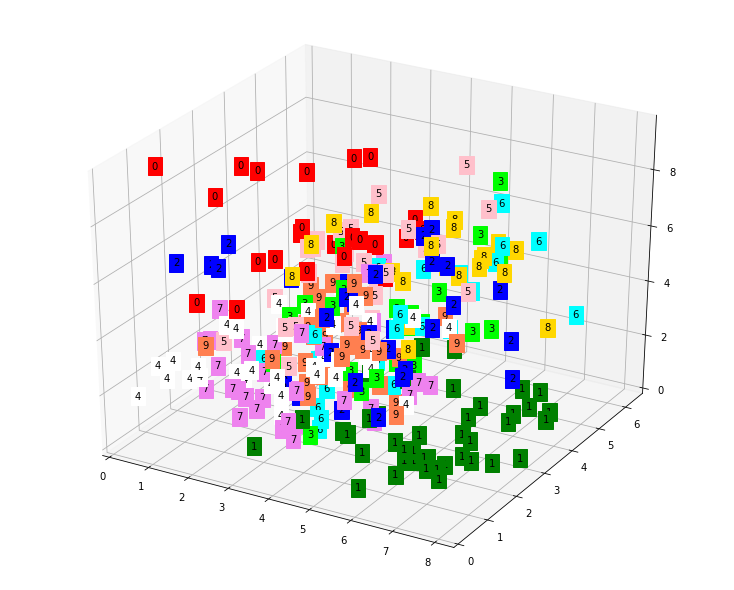

In [0]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

# Calculate Reconstruction Error & Visualize Reconstructed Images

In [0]:
#Calculate Reconstruction Error
errors = []
for i in range(len(x_test)):
  mse = np.mean((x_test[i]-reconstructed_imgs[i])**2)
  errors.append(mse)

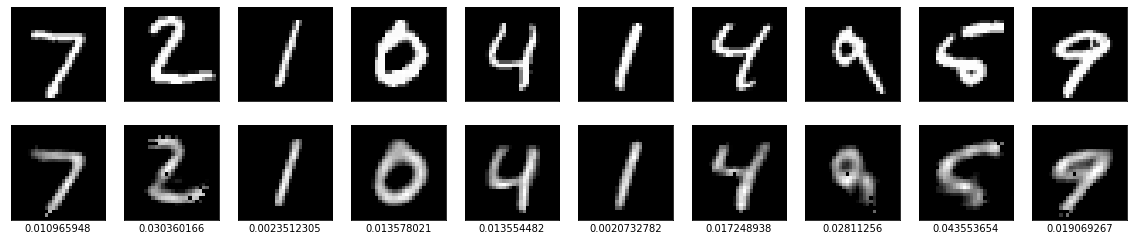

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    #ax.get_xaxis().set_visible(False)
    plt.xticks([])
    ax.get_yaxis().set_visible(False)

    #display error
    plt.xlabel(str(errors[i]))
plt.show()